<a href="https://colab.research.google.com/github/CALDISS-AAU/sdsphd19_coursematerials/blob/master/notebooks/SDS_PhD19_NLP_Longtext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Long texts and extracting some linguistic features

Now, that we have some experience with short texts, let's try out to work with longer texts. We will be analysing a newspaper article as well as a whole (very long) book. I prepared an example which also covers data-collection as well as easy article scaping [here](https://colab.research.google.com/github/SDS-AAU/M2-2019/blob/master/notebooks/Newspaper_NER_Networks.ipynb).

In this part of the tutorial, I will introduce Spacy, a high-level DeepLearning based NLP library that will help us to do complex stuff with not too much code and without havint do go deep into "old-school-NLP"

<h2 align="center"></h2>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/SpaCy_logo.svg/1200px-SpaCy_logo.svg.png" width="600">


Here a nice [cheat-sheet
](https://github.com/abhat222/Data-Science--Cheat-Sheet/raw/master/Python/spaCy.pdf)
Spacy is today one of the leading solutions for NLP in industry which goes as far as them hosting a [whole conference](https://www.youtube.com/watch?v=hNPwRPg9BrQ&list=PLBmcuObd5An4UC6jvK_-eSl6jCvP1gwXc) with the leading NLP experts worldwide in Berlin last summer

I will introduce you to some functionality but not all. There is an advanced course on SpaCy that can be found on DC.

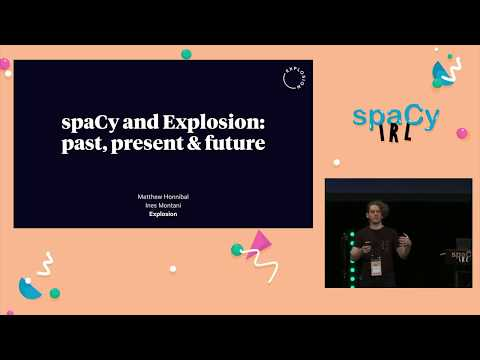

In [0]:
#@title ## Spacy past - present - future

from IPython.display import YouTubeVideo
YouTubeVideo('Jk9y17lvltY',start=435, frameborder="0", width=800, height=500)

In [0]:
!pip install -qq gutenberg-cleaner

In [0]:
import itertools
import numpy as np
from collections import Counter

In [11]:
import nltk #this part is needed on colab.
nltk.download('punkt')
nltk.download('stopwords')
#----------------------------------------

# Tokenizing sentences
from nltk.tokenize import sent_tokenize

# Tokenizing words
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Here is a long article text 
article = """'(CNN) Donald Trump drove Democrats to the first crucial pivot point of their impeachment confrontation on Tuesday with a defiant declaration that his administration would not cooperate with the investigation.\n\nIn a fierce counter-attack after days of failing to control a torrent of damaging disclosures, the Trump White House branded the inquiry an illegal bid to overthrow the 2016 election and blocked testimony from a top diplomat.\n\n"Never before in our history has the House of Representatives -- under the control of either political party -- taken the American people down the dangerous path you seem determined to pursue," White House counsel Pat Cipollone wrote in a letter to House Speaker Nancy Pelos i and her key committee chairs.\n\nThe letter in effect gave notice of all out political warfare as part of the administration\'s strategy to deprive investigators of all the testimony and evidence that they have demanded, in a clear effort to throttle the capacity of the probe into whether Trump abused his power by pressuring Ukraine to investigate a political opponent -- Joe Biden.\n\nPelosi says there is no constitutional requirement supporting Trump\'s demand for a full House vote to initiate impeachment proceedings -- one justification given for the President\'s refusal to cooperate.\n\nBut Trump\'s move left her with grave strategic decisions on what to do next in a confrontation that puts to the test the integrity of America\'s bedrock separation of powers and will determine whether she truly gamed out this duel several steps ahead.\n\nChallenging Trump\'s position in court could bog down the impeachment drive in months of legal challenges. Folding the President\'s obstruction into articles of impeachment in short order could play into his claims that she\'s running a "kangaroo court" and rushing the most consequential function of Congress.\n\nThe American people will now be effectively asked whether a President who accepts few limits on his power can be held in check by a separate branch of government or whether he can avoid such an examination, a decision that will echo through history.\n\nDemocrats are already arguing that Trump\'s position is a de facto admission of guilt based on a legal and political house of sand.\n\n"I guess they haven\'t read the Constitution," said Rep. Tom Malinowski of New Jersey, a Democrat who serves on the House Foreign Affairs Committee.\n\n"If they don\'t defend themselves, against the copious evidence that we already have, then I think it disadvantages them," Malinowski told CNN\'s Erin Burnett.\n\n"This is not the kind of investigation where we are starting with nothing -- we are starting with everything."\n\nTrump\'s call \'crazy\' and \'frightening\'\n\nThe nation\'s most serious political crisis in decades came to a head as more shocking details emerged of Trump\'s attempt to pressure Ukraine.\n\nThe now famous whistleblower wrote a memo that describes a White House official as characterizing the call with Volodymyr Zelensky as "crazy" and "frightening," a source familiar with the whistleblower complaint said.\n\nThe New York Times , which first reported the new details, said in its piece that White House lawyers discussed how to handle the discussion because in the official\'s view the president had clearly committed a criminal act."\n\nIn another break in the drama, CNN reported that Gordon Sondland -- the US ambassador to the EU who Trump prevented from testifying to Congress on Tuesday -- directly called the President in September to find out what was going on amid discussions among his peers over whether US military aid to Ukraine was being withheld.\n\nThe nugget raises the possibility that Sondland\'s text to a colleague that there was no quid pro quo involved was on the orders of the President himself -- a possibility Democrats will surely want to investigate.\n\nHouse Intelligence Committee chairman Adam Schiff suggested Monday that Sondland had texts and emails on a personal device that the State Department was refusing to hand over.\n\nThe new revelations explain why the White House is refusing to cooperate with the impeachment inquiry. It can\'t allow a window into wild, self-serving and possibly even criminal behavior by the President in his dealings with Ukraine that could turn Americans against him.\n\nAs Democrats seek to make a case that the President defies constitutional norms and abuses his power by setting foreign policy for personal political ends, Trump\'s aides must try to slow their momentum and weave a tale of congressional overreach.\n\nThe struggle intensified further after multiple polls showed a majority of Americans now support opening an impeachment inquiry.\n\nBut there is not yet a majority for removing the President from office, underscoring the critical impact of the political battle in Washington now being fully joined by both sides.\n\nTrump dares Pelosi to hold risky vote\n\nTrump\'s letter effectively dares Pelosi, who may want to protect her more moderate members from political damage, to hold a full vote in the House on moving forward with the inquiry.\n\nSuch a vote was held in the last two impeachment sagas concerning Presidents Richard Nixon and Bill Clinton, but there is nothing in the Constitution that mandates such a vote. Trump\'s team says the absence of such a vote means that he has no choice but to withhold cooperation to preserve the scope of his office for future occupants.\n\n"At a constitutional level, that is what we call complete and total nonsense," said CNN legal and national security analyst Susan Hennessey on "The Situation Room."\n\nThe White House maintained that without such a vote, the President and other Executive Branch officials will be denied basic rights available to all Americans.\n\nIt accused Pelosi of denying Trump the right to cross-examine witnesses, to have access to evidence, and for counsel to be present during depositions.\n\n"Put simply, you seek to overturn the results of the 2016 election and deprive the American people of the President they have freely chosen," Cipollone wrote.\n\nHe also argued that the President did nothing wrong in his call with Zelensky, and claimed that Democrats had prejudiced the case with unfair process and had violated the separation of powers.\n\nThe tone of the letter however was far more partisan in tone than legalistic, reflecting that the battle over Trump\'s fate will now come down to a vicious political fight. Mostly, it appeared to defend Trump based on the perceived unfairness of the political process rather than the merits of the Ukraine case.\n\nPelosi vowed in her own letter to House Democrats: "The President will be held accountable. When it comes to impeachment, it is just about the facts and the Constitution," she wrote.\n\n"At the same time as President Trump is obstructing justice, abusing power and diminishing the office of the presidency, we have a responsibility to strengthen the institution in which we serve. This is essential if we are to honor the separation of powers which is the genius of the Constitution."\n\nThe Speaker could decide to call the President\'s bluff by scheduling a full House vote. But there is no guarantee that Trump would cooperate if a full House vote takes place.\n\n"We don\'t want to speculate on what would happen in various hypothetical situations" Cipollone wrote.\n\nA vote would also give Republicans a platform to grandstand and to turn the impeachment process into a circus -- as they have done in previous Democratic oversight hearings -- a factor that might weigh on Pelosi\'s deliberations.\n\nBut there is also an argument that offering Trump a blueprint for an open process, with clearly defined impeachment goals, is not just politically smart but it\'s the right thing to do at a perilous national moment that demands basic standards of fairness.\n\nAs the shockwaves of Trump\'s letter rocked Capitol Hill, Democrats issued a subpoena for testimony and evidence from Sondland, who was stopped from offering a deposition on Capitol Hill by the White House hours before his Tuesday appointment.\n\nStill, as this tumultuous presidency has shown, refusing a congressional subpoena is less risky than ignoring a criminal summons. Democrats could hold recalcitrant witnesses in contempt but that would entail the kind of legal imbroglio they are seeking to avoid, which Trump plans to create.\n\nDemocratic House Intelligence Committee Chairman Adam Schiff hinted that the remedy for the refusal of Sondland and other key officials to testify would rebound against the President.\n\n"The failure to produce this witness, the failure to produce these documents we consider yet additional strong evidence of obstruction of the constitutional functions of Congress," Schiff told reporters.\n\nGirding for the battle ahead, the White House contacted outside lawyers as it seeks impeachment counsel. One of those attorneys is former South Carolina Rep. Trey Gowdy, CNN\'s Pamela Brown reported on Tuesday.'"""

In [0]:
# Let's fire up spacy

import spacy

In [0]:
# and load the small english language model. Large models can be downloaded for many languages.
nlp = spacy.load("en")

In [0]:
# Let's apply the model to the article (as easy as that)
article_nlp = nlp(article)

When you call spaCy it will perform a number of NLP tasks on the text right away.
These tasks are bundled in a pipeline, which can be customised if needed.

![alt text](https://spacy.io/pipeline-7a14d4edd18f3edfee8f34393bff2992.svg)

source: https://spacy.io/usage/processing-pipelines


In [16]:
# Yes spacy recognises entities in the text out of the box (among many other things)
[(ent.text, ent.label_) for ent in article_nlp.ents][:20]

[('CNN', 'ORG'),
 ('Donald Trump', 'PERSON'),
 ('Democrats', 'NORP'),
 ('first', 'ORDINAL'),
 ('Tuesday', 'DATE'),
 ('days', 'DATE'),
 ('Trump White House', 'ORG'),
 ('2016', 'DATE'),
 ('the House of Representatives', 'ORG'),
 ('American', 'NORP'),
 ('White House', 'ORG'),
 ('Pat Cipollone', 'PERSON'),
 ('House', 'ORG'),
 ('Nancy Pelos', 'PERSON'),
 ('Trump', 'ORG'),
 ('Ukraine', 'GPE'),
 ('Joe Biden', 'PERSON'),
 ('Pelosi', 'PERSON'),
 ('Trump', 'ORG'),
 ('House', 'ORG')]

No more Trump. Let's raise the bar with some **Fyodor Dostoevsky**

![alt text](https://i.pinimg.com/564x/bc/eb/9c/bceb9cef99abbed52b940767c9530bbc.jpg)

In [0]:
#let's drop wget-ting and use requests insted (like grown ups)

import requests as rq 

crime_and_punishment_raw = rq.get('http://www.gutenberg.org/files/2554/2554-0.txt').text

In [0]:
from gutenberg_cleaner import simple_cleaner

In [0]:
crime_and_punishment_raw = simple_cleaner(crime_and_punishment_raw)

In [0]:
# we can devide the book up into sentences

crime_and_punishment_sents = sent_tokenize(crime_and_punishment_raw)

In [0]:
# and then feed every sentence into spacy
crime_and_punishment_sents_nlp = [doc for doc in nlp.pipe(crime_and_punishment_sents)]

In [22]:
#And that's how sentence 200 looks like
crime_and_punishment_sents_nlp[200]

But there was something very
strange in him; there was a light in his eyes as though of intense
feeling--perhaps there were even thought and intelligence, but at the
same time there was a gleam of something like madness.

In [0]:
# Now a bit of a longer chunk of code
# Let's make a list of lists with all person entities
ents_from_sents = []

for sentance in crime_and_punishment_sents_nlp:
    
  sentance_entities = [ent.text for ent in sentance.ents if ent.label_ == 'PERSON']
  sentance_entities = list(set(sentance_entities))

  if len(sentance_entities) > 1:
    ents_from_sents.append(sentance_entities)

In [24]:
# Not perfect but I guess OK...
ents_from_sents[10:20]

[['Darya Frantsovna', 'Sofya Semyonovna'],
 ['Amalia Fyodorovna',
  'Darya Frantsovna',
  'Katerina Ivanovna',
  'Lebeziatnikov'],
 ['Katerina', 'Ivanovna'],
 ['Kapernaumovsâ\x80\x99', 'Katerina Ivanovna', 'Sonia'],
 ['Amalia Fyodorovna', 'Katerina Ivanovna'],
 ['Semyon Zaharovitch', 'Zaharovitch'],
 ['Thy', 'Katerina Ivanovna'],
 ['Kozelâ\x80\x99s', 'Marmeladov', 'Raskolnikov'],
 ['Katerina Ivanovna', 'Raskolnikov'],
 ['Marmeladov', 'Raskolnikov']]

In [0]:
# And here is what we are going to do with it
# Yes - a network
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
# Instantiate graph
G = nx.Graph()

In [0]:
# Create the graph
for i in ents_from_sents:
  G.add_edges_from(list(itertools.combinations(i,2)))

In [0]:
# Calculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

In [0]:
# Getting a "reasonable" lower bound.
perc_filter = np.percentile([v for u,v in degree_centrality.items()], 80)

In [0]:
# Make a subgraph based on nodes with a degree_centrality over the threshold
nodes_selected = [x for x,y in degree_centrality.items() if y >= perc_filter]

G = G.subgraph(nodes_selected)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 156 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags

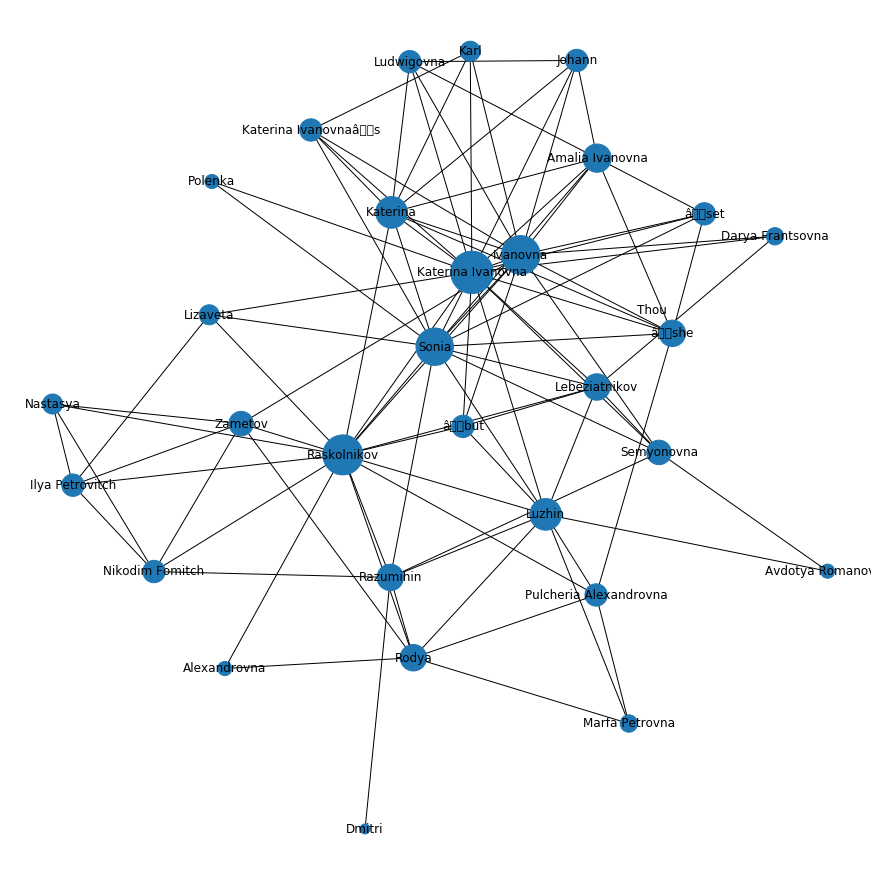

In [37]:
# Not pretty at all
plt.figure(figsize=(12,12)) 
nx.draw_kamada_kawai(G, with_labels = True, node_size=[v * 100 for v in dict(G.degree).values()])

want to know more? Read the book or check out this: https://www.sparknotes.com/lit/crime/characters/

### Bonus: Interactive pretty plot

In [52]:
!pip install -qq holoviews
!pip install -qq -U bokeh
!pip install -qq datashader

     |████████████████████████████████| 15.5MB 162kB/s 
     |████████████████████████████████| 81kB 10.1MB/s 
     |████████████████████████████████| 1.6MB 47.3MB/s 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
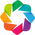

In [59]:
# Import the libraries and link to the bokeh backend
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show
kwargs = dict(width=800, height=800, xaxis=None, yaxis=None)
opts.defaults(opts.Nodes(**kwargs), opts.Graph(**kwargs))


In [0]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G) 
g_plot = hv.Graph.from_networkx(G, G_layout).opts(tools=['hover'])
labels = hv.Labels(g_plot.nodes, ['x', 'y'], 'index')

In [0]:
from holoviews.operation.datashader import datashade, bundle_graph
bundled = bundle_graph(g_plot)

In [67]:
show(hv.render(bundled * labels.opts(text_font_size='10pt', text_color='white', bgcolor='gray')))